In [280]:
import torch
from sklearn.datasets import load_svmlight_file
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score,f1_score,roc_curve,roc_auc_score,balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


# Data Exploration

In [264]:
# Here, we use the original dataset to see the distribution and get know more information about the data
#Loading the dataset from kaggle
diabetes_data_kaggle = pd.read_csv('diabetes.csv')
#Print the first 5 rows of the dataframe.
diabetes_data_kaggle.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [265]:
diabetes_data_copy = diabetes_data_kaggle.copy(deep = True)
diabetes_data_copy = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI',"DiabetesPedigreeFunction","Age"]].replace(0,np.NaN)

## showing the count of missing data
print(diabetes_data_copy.isnull().sum())

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


0    500
1    268
Name: Outcome, dtype: int64


C:\Users\bensu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


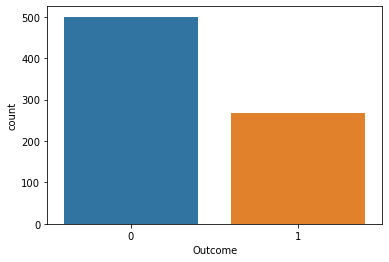

In [266]:
# ax = sns.countplot(cancer_df.label,label="Count")
print(diabetes_data_kaggle['Outcome'].value_counts())
ax = sns.countplot(diabetes_data_kaggle.Outcome,label="Count")

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

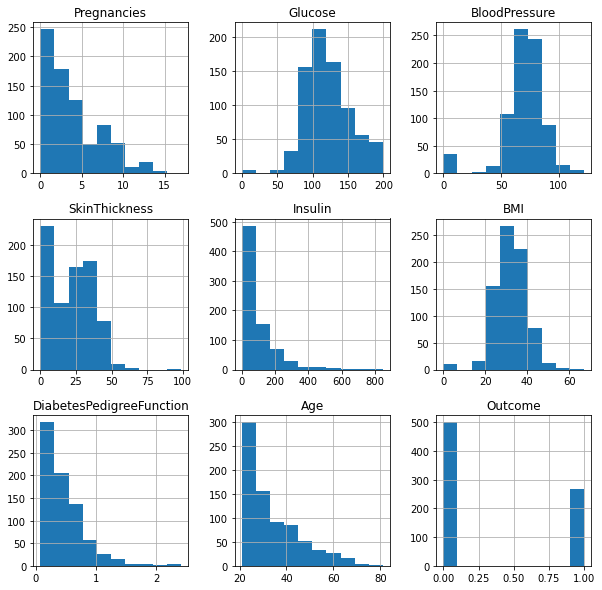

In [267]:
diabetes_data_kaggle.hist(figsize = (10,10))

# Implementation of Perceptron

In [268]:
#load the dataset
data = load_svmlight_file("diabetes_database.txt") # this is tuple

# seperate into feature and label
csr_matrix_feature = data[0]
csr_matrix_label = data[1]

In [269]:
# size of the features
print(csr_matrix_feature.shape)
# size of the labels
print(csr_matrix_label.shape)

(768, 8)
(768,)


In [270]:
print(type(csr_matrix_feature))
print(csr_matrix_feature)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 0)	-0.294118
  (0, 1)	0.487437
  (0, 2)	0.180328
  (0, 3)	-0.292929
  (0, 4)	-1.0
  (0, 5)	0.00149028
  (0, 6)	-0.53117
  (0, 7)	-0.0333333
  (1, 0)	-0.882353
  (1, 1)	-0.145729
  (1, 2)	0.0819672
  (1, 3)	-0.414141
  (1, 4)	-1.0
  (1, 5)	-0.207153
  (1, 6)	-0.766866
  (1, 7)	-0.666667
  (2, 0)	-0.0588235
  (2, 1)	0.839196
  (2, 2)	0.0491803
  (2, 3)	-1.0
  (2, 4)	-1.0
  (2, 5)	-0.305514
  (2, 6)	-0.492741
  (2, 7)	-0.633333
  (3, 0)	-0.882353
  :	:
  (764, 7)	-0.8
  (765, 0)	-0.411765
  (765, 1)	0.21608
  (765, 2)	0.180328
  (765, 3)	-0.535354
  (765, 4)	-0.735225
  (765, 5)	-0.219076
  (765, 6)	-0.857387
  (765, 7)	-0.7
  (766, 0)	-0.882353
  (766, 1)	0.266332
  (766, 2)	-0.0163934
  (766, 3)	-1.0
  (766, 4)	-1.0
  (766, 5)	-0.102832
  (766, 6)	-0.768574
  (766, 7)	-0.133333
  (767, 0)	-0.882353
  (767, 1)	-0.0653266
  (767, 2)	0.147541
  (767, 3)	-0.373737
  (767, 4)	-1.0
  (767, 5)	-0.0938897
  (767, 6)	-0.797609
  (767, 7)	-0.933333


In [271]:
# convert feature into numpy array
feature = csr_matrix_feature.toarray()
label = csr_matrix_label
feature

array([[-0.294118  ,  0.487437  ,  0.180328  , ...,  0.00149028,
        -0.53117   , -0.0333333 ],
       [-0.882353  , -0.145729  ,  0.0819672 , ..., -0.207153  ,
        -0.766866  , -0.666667  ],
       [-0.0588235 ,  0.839196  ,  0.0491803 , ..., -0.305514  ,
        -0.492741  , -0.633333  ],
       ...,
       [-0.411765  ,  0.21608   ,  0.180328  , ..., -0.219076  ,
        -0.857387  , -0.7       ],
       [-0.882353  ,  0.266332  , -0.0163934 , ..., -0.102832  ,
        -0.768574  , -0.133333  ],
       [-0.882353  , -0.0653266 ,  0.147541  , ..., -0.0938897 ,
        -0.797609  , -0.933333  ]])

In [272]:
print("Size of the feature:",feature.shape," \nSize of the label:",label.shape)

Size of the feature: (768, 8)  
Size of the label: (768,)


In [273]:
# initial a weight:
np.random.seed(89)
weights=np.random.rand(8)
initial_rand_weights=weights

In [274]:
# Make a prediction with weights
def predict(row, weights):
    activation = 0
    for i in range(len(weights)):
        activation += weights[i] * row[i]
        predict_sig = np.sign(activation)
    return predict_sig

def accuracy(predict,actual):    
    # manually compare the accuracy of predict and actual
    count=0
    for i in range(len(predict)):
        if predict[i] == actual[i]:
            count+=1
    accuracy=count/len(predict)
    return accuracy

# Make a prediction with weights
def update_weight(feature, weights):
    learning_rate = 0.001  
    summation =0
    for i, j in zip(feature,label):       
#         summation += i*j
        if (j *(np.dot(i,weights)))<0:
            summation += i*j* 1
        else:
            summation += i*j* 0 
    new_weight = weights + (learning_rate*summation)
    
    weights = new_weight       
    return weights

In [275]:
# run a for loop to update the weight
from sklearn.metrics import accuracy_score
best_acc = 0
best_weight = 0

for i in range(20):
    array_prediction = []
    for row in feature: 
        one_prediction = predict(row, weights) # give you one prediction
        array_prediction.append(one_prediction) # append one prediction in array
    answer=accuracy(array_prediction,label)  
   # accuracy_weight_list.append((answer,weights))
    
    if answer>best_acc:
        best_acc= answer
        best_weight = weights
    weights = update_weight(feature, weights)  

print("Best accuracy after 20 epochs: ",best_acc,"\nBest weight after 20 epochs: ",best_weight)


Best accuracy after 20 epochs:  0.765625 
Best weight after 20 epochs:  [-0.09171749 -0.39463565  0.11992028 -0.09792692  0.13231268 -0.27997414
 -0.15533049 -0.10695236]


# Experiment the data 
- without bias and  with bias 
- split into training, validatioin, testing set
- adding bias (for one epho,there are one bia, when the weight being updated, the bia will update too)
- run a for loop to update the weight
- update the weight using training set
- test in validation to fine the best weight

In [276]:
# create functions to 
#1) find the accuracy score
#2) update the weights
#3) find the loss

# Make a prediction with weights
# return the accuracy

def predict_exp(features, label, weights):
    pred = []
    for row in features:
        activation = 0
        for i in range(len(row)):
            activation += weights[i] * row[i]
        pred.append(np.sign(activation))  
    return (accuracy_exp(label, pred))

def accuracy_exp(actual,predict):    
    # manually compare the accuracy of predict and actual
    return (accuracy_score(actual, predict))

# Make a prediction with weights
def update_weight_exp(lr, feature, weights,label):
#    learning_rate = 0.001  
    summation =0
    for i, j in zip(feature,label):       
#         summation += i*j
        if (j *(np.dot(i,weights)))<0:
            summation += i*j* 1
        else:
            summation += i*j* 0 
    new_weight = weights + (lr*summation)
    return new_weight

# Make a prediction with weights
def loss(feature, weights,label):
    summation_loss =0
    for i, j in zip(feature,label):       
#         summation += i*j
        if (j *(np.dot(i,weights)))<0:
            summation_loss += 1
        else:
            summation_loss += 0 
            
    return (summation_loss/len(label))


# plot the ROC AUC curve 
def accuracy_plots(features,labels,weight):
    pred = list()
    for row in features:
        activation = 0
        for i in range(len(row)):
            activation += weight[i] * row[i] # 
        pred.append(np.sign(activation))# Predictig for 1 row
    print("Precision :",precision_score(labels, pred, average="binary"))
    print("Recall :",recall_score(labels, pred, average="binary"))
    print("F1 Score :",f1_score(labels, pred, average="binary"))
    
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(labels))]
    ns_auc = roc_auc_score(labels, ns_probs)
    ns_fpr, ns_tpr, _ = roc_curve(labels, ns_probs)
    
    plt.figure(dpi=100)
    fpr, tpr, thresholds = roc_curve(labels,pred)
    plt.plot(fpr,tpr,label = "%.2f"% roc_auc_score(labels,pred), ls="--")
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline')
    
    plt.legend()
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    
    plt.title('ROC curve for Diabetes classifier')
    plt.xlabel('False positive rate (1-Specificity)')
    plt.ylabel('True positive rate (Sensitivity)')
    plt.grid(True)
    
    return 

# Without bias

In [277]:
# without bias model
# train test split without bias
Big_train_features, test_features, Big_train_labels, test_labels = train_test_split(feature, label, test_size = 0.2, random_state=42, stratify = label)
train_features, val_features, train_labels, val_labels, = train_test_split(Big_train_features,Big_train_labels, test_size = 0.2, random_state=42, stratify =Big_train_labels)
print(train_features.shape, val_features.shape, test_features.shape, train_labels.shape, val_labels.shape,test_labels.shape)

(491, 8) (123, 8) (154, 8) (491,) (123,) (154,)


# Create a baseline of the model

In [296]:
from sklearn.linear_model import Perceptron
perceptron_baseline = Perceptron(tol=1e-3,random_state=42)
perceptron_baseline.fit(Big_train_features,Big_train_labels)
Perceptron()
predict = perceptron_baseline.predict(test_features)

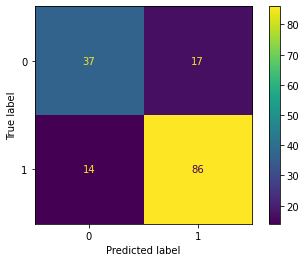

In [297]:
cm_baseline= confusion_matrix (test_labels, predict)
cm_table_baseline = ConfusionMatrixDisplay(cm_baseline)
cm_table_baseline
cm_table_baseline.plot()
plt.show()

In [302]:
print("baseline precision: ",precision_score(test_labels,predict))
print("baseline recall: ",recall_score(test_labels,predict))
print("baseline sensitivity:",recall_score(test_labels_b, predict))
print("baseline specificity:",(86/(86+17)))
print("baseline accuracy:",perceptron_baseline.score(test_features,test_labels))
print("baseline balanced accuracy: ",balanced_accuracy_score(test_labels,predict))

baseline precision:  0.8349514563106796
baseline recall:  0.86
baseline sensitivity: 0.67
baseline specificity: 0.8349514563106796
baseline accuracy: 0.7987012987012987
baseline balanced accuracy:  0.7725925925925926


Number of epoch: 10 , learning rate 0.001


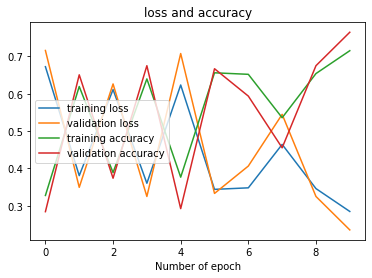

Number of epoch: 20 , learning rate 0.001


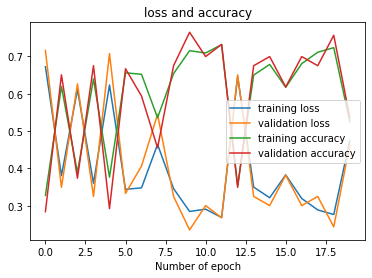

Number of epoch: 30 , learning rate 0.001


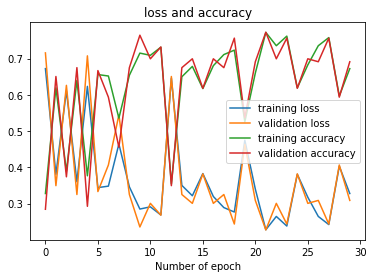

Number of epoch: 40 , learning rate 0.001


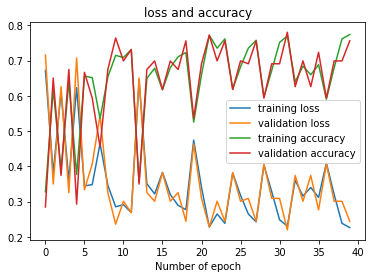

Number of epoch: 10 , learning rate 0.01


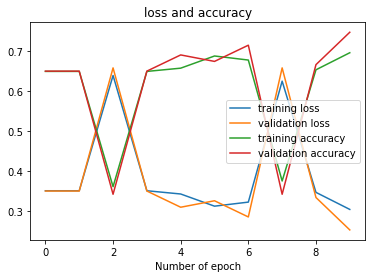

Number of epoch: 20 , learning rate 0.01


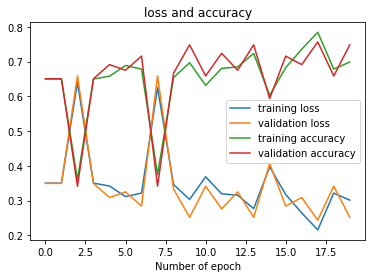

Number of epoch: 30 , learning rate 0.01


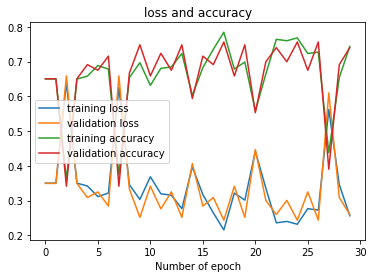

Number of epoch: 40 , learning rate 0.01


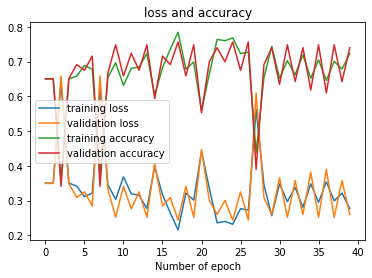

Number of epoch: 10 , learning rate 0.1


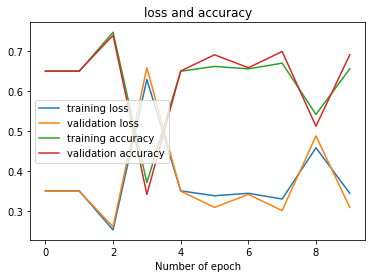

Number of epoch: 20 , learning rate 0.1


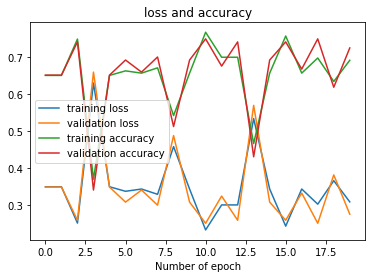

Number of epoch: 30 , learning rate 0.1


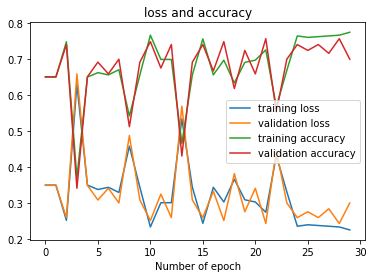

Number of epoch: 40 , learning rate 0.1


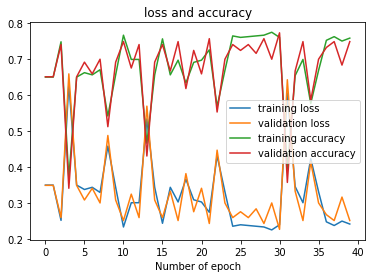

In [240]:
#Doing the experiment with perceptron WITHOUT bias
# giving the testing value of the hyperparameter
learning_rates=[0.001,0.01,0.1]
#epoc= range(10,50,10)
detail_no_bias = []
for lr in learning_rates:   

    for epoch in range(10,50,10):
        best_weight = 0
        best_acc = 0
        loss_train = [] # loss in training set
        loss_val = [] # loss in validation set        
        acc_train = [] 
        acc_val = []        
        np.random.seed(89)
        weights= np.random.rand(8)
    
        for j in range(epoch):
            weights = update_weight_exp(lr,train_features, weights,train_labels)
           # predict_train = predict_exp(train_features, weights)
           # predict_val = predict_exp(val_features, weights)
                      
            training_acc = predict_exp(train_features,train_labels, weights)
            val_acc = predict_exp(val_features,val_labels, weights)
            
            acc_train.append(training_acc) # save each training accuracy into the list
            acc_val.append(val_acc)# save each validation accuracy into the list
            
            traing_loss = loss(train_features, weights,train_labels)          
            loss_train.append(traing_loss)
        
            
            val_loss = loss(val_features, weights,val_labels)
            loss_val.append(val_loss)
            
                       
            
            if val_acc > best_acc:
                best_acc= val_acc
                best_weight = weights     
       # print(len(loss_train))
        
        
        print("Number of epoch:",epoch,", learning rate",lr)
        plt.title("loss and accuracy")


        
        plt.plot(np.arange(epoch),loss_train,label ="training loss")
        plt.plot(np.arange(epoch),loss_val,label ="validation loss")
        plt.plot(np.arange(epoch),acc_train,label ="training accuracy")
        plt.plot(np.arange(epoch),acc_val,label ="validation accuracy")
        plt.xlabel("Number of epoch")
        plt.legend()
        
        plt.show()
        detail_no_bias.append((val_acc,epoch,lr,best_weight))
        
        
# plt.figure(figsize=(12,15))
# for i,j in unique_pair:  
#     plt.subplot(3,2,cnt)        

In [241]:
detail_no_bias.sort(reverse=True)
table_no_bias=pd.DataFrame(detail_no_bias,columns=["Val accuracy","Epoch","learning rate","weights"])
table_no_bias

,Val accuracy,Epoch,learning rate,weights
0,0.764228,10,0.001,"[-0.015893972531165035, -0.14495228002832966, ..."
1,0.756098,40,0.001,"[-0.08171753603116452, -0.2687763707983296, 0...."
2,0.747967,40,0.100,"[-7.847369979531077, -19.628985269688314, 7.91..."
3,0.747967,20,0.010,"[-0.9191296545311582, -2.886374151988329, 0.55..."
4,0.747967,10,0.010,"[-1.1844236395311585, -2.5848164195883285, 0.2..."
5,0.739837,40,0.010,"[-0.9191296545311582, -2.886374151988329, 0.55..."
6,0.739837,30,0.010,"[-0.9191296545311582, -2.886374151988329, 0.55..."
7,0.723577,20,0.100,"[-7.823836979531105, -26.265166128688314, 0.92..."
8,0.699187,30,0.100,"[-11.453251329531083, -27.546070410688316, 5.8..."
9,0.691057,30,0.001,"[-0.07465869603116464, -0.3058216009383296, 0...."


In [242]:
# best_weights_no_bias= table_no_bias['weights'][0]
# best_weights_no_bias
# acc_test = predict_exp(test_features, test_labels, best_weights_no_bias)
# print("Testing accuracy without bias:", acc_test)
# accuracy_plots(test_features,test_labels,best_weights_no_bias)

# With bias

In [243]:
# adding one column for the feature to store the bias
bias_array = np.ones(len(feature))
bias_array = bias_array.reshape(1,len(bias_array))
new_features = np.concatenate((feature, np.transpose(bias_array)), axis=1)
new_features

array([[-0.294118 ,  0.487437 ,  0.180328 , ..., -0.53117  , -0.0333333,
         1.       ],
       [-0.882353 , -0.145729 ,  0.0819672, ..., -0.766866 , -0.666667 ,
         1.       ],
       [-0.0588235,  0.839196 ,  0.0491803, ..., -0.492741 , -0.633333 ,
         1.       ],
       ...,
       [-0.411765 ,  0.21608  ,  0.180328 , ..., -0.857387 , -0.7      ,
         1.       ],
       [-0.882353 ,  0.266332 , -0.0163934, ..., -0.768574 , -0.133333 ,
         1.       ],
       [-0.882353 , -0.0653266,  0.147541 , ..., -0.797609 , -0.933333 ,
         1.       ]])

In [244]:
# train test split WITH bias
# since I have add one column, so there would be 8 features +1 bias = 9 columns
from sklearn.model_selection import train_test_split
# train test split
Big_train_features_b, test_features_b, Big_train_labels_b, test_labels_b = train_test_split(new_features, label, test_size = 0.2, random_state=89, shuffle = True, stratify = label)
train_features_b, val_features_b, train_labels_b, val_labels_b, = train_test_split(Big_train_features_b,Big_train_labels_b, test_size = 0.2, random_state=89, shuffle =True, stratify =Big_train_labels_b)
print(train_features_b.shape, val_features_b.shape, test_features_b.shape, train_labels_b.shape, val_labels_b.shape,test_labels_b.shape)

(491, 9) (123, 9) (154, 9) (491,) (123,) (154,)


# Tuning the hyperparameter: learning rate, epoch
(with bias model)

Number of epoch 10 , learning 0.001


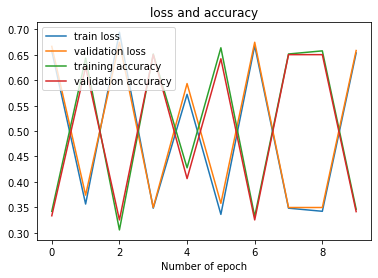

Number of epoch 20 , learning 0.001


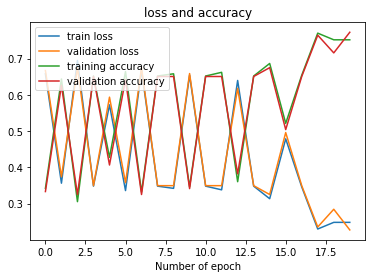

Number of epoch 30 , learning 0.001


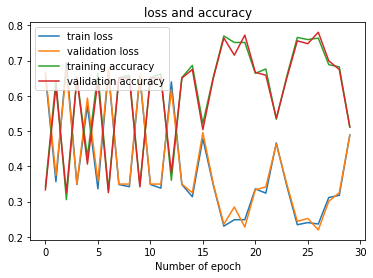

Number of epoch 40 , learning 0.001


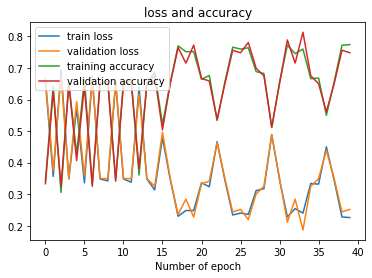

Number of epoch 10 , learning 0.01


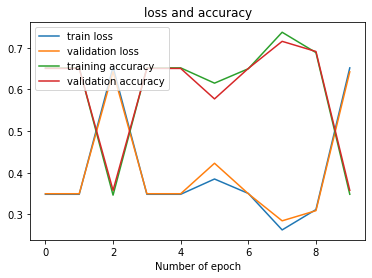

Number of epoch 20 , learning 0.01


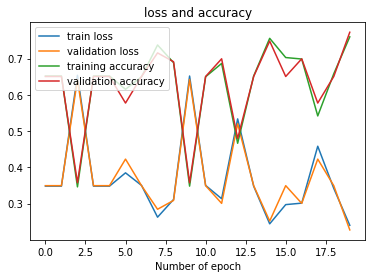

Number of epoch 30 , learning 0.01


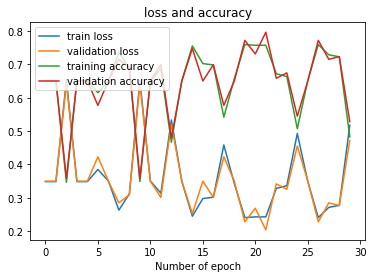

Number of epoch 40 , learning 0.01


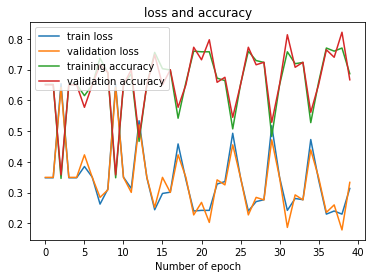

Number of epoch 10 , learning 0.1


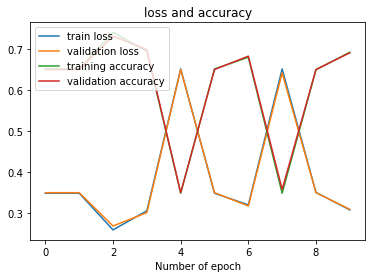

Number of epoch 20 , learning 0.1


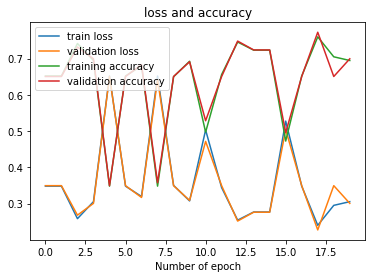

Number of epoch 30 , learning 0.1


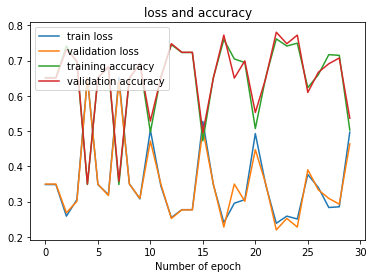

Number of epoch 40 , learning 0.1


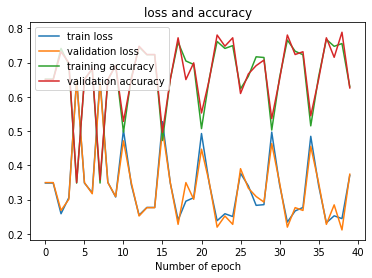

In [245]:
#Doing the experiment with perceptron WITHOUT bias
# giving the testing value of the hyperparameter
learning_rates=[0.001,0.01,0.1]
#epoc= range(10,50,10)
detail_yes_bias = []
for lr in learning_rates:   

    for epoch in range(10,50,10):
        best_weight = 0
        best_acc = 0
        loss_train = [] # loss in training set
        loss_val = [] # loss in validation set        
        acc_train = [] 
        acc_val = []        
        np.random.seed(89)
        weights= np.random.rand(9)
    
        for j in range(epoch):
            weights = update_weight_exp(lr,train_features_b, weights,train_labels_b)
           # predict_train = predict_exp(train_features, weights)
           # predict_val = predict_exp(val_features, weights)
                      
            training_acc = predict_exp(train_features_b,train_labels_b, weights)
            val_acc = predict_exp(val_features_b,val_labels_b, weights)
            
            acc_train.append(training_acc) # save each training accuracy into the list
            acc_val.append(val_acc)# save each validation accuracy into the list
            
            traing_loss = loss(train_features_b, weights,train_labels_b)          
            loss_train.append(traing_loss)
        
            
            val_loss = loss(val_features_b, weights,val_labels_b)
            loss_val.append(val_loss)
            
                       
            
            if val_acc > best_acc:
                best_acc= val_acc
                best_weight = weights     
       # print(len(loss_train))
        
        
        print("Number of epoch",epoch,", learning",lr)
        plt.title("loss and accuracy")


        #plt.plot(figsize=(12,15))
        plt.plot(np.arange(epoch),loss_train,label ="train loss")
        plt.plot(np.arange(epoch),loss_val,label ="validation loss")
        plt.plot(np.arange(epoch),acc_train,label ="training accuracy")
        plt.plot(np.arange(epoch),acc_val,label ="validation accuracy")
        plt.xlabel("Number of epoch")
        plt.legend(loc="upper left")
        
        plt.show()
        detail_yes_bias.append((val_acc,epoch,lr,best_weight))
        
        
# plt.figure(figsize=(12,15))
# for i,j in unique_pair:  
#     plt.subplot(3,2,cnt)        

In [246]:
detail_yes_bias.sort(reverse=True)
table_yes_bias=pd.DataFrame(detail_yes_bias,columns=["Val accuracy","Epoch","learning rate","weights"])
table_yes_bias

,Val accuracy,Epoch,learning rate,weights
0,0.772358,20,0.010,"[-0.8855998245311594, -3.7298410849883235, 0.0..."
1,0.772358,20,0.001,"[-0.025423343531164957, -0.394238652978329, 0...."
2,0.747967,40,0.001,"[-0.05454098453116479, -0.40041451073832884, 0..."
3,0.699187,20,0.100,"[-11.30030567953109, -34.19330326068828, 0.043..."
4,0.691057,10,0.100,"[-3.7532468295311503, -11.439035971688316, -2...."
5,0.666667,40,0.010,"[-0.8197174645311559, -3.4491373529883225, 0.6..."
6,0.626016,40,0.100,"[-9.935600029531043, -33.62646674768826, 6.802..."
7,0.536585,30,0.100,"[-10.153246579531077, -37.44305103368827, 1.46..."
8,0.528455,30,0.010,"[-0.7532468945311594, -3.281147656888323, 0.30..."
9,0.512195,30,0.001,"[-0.03465863203116484, -0.4037914035083289, 0...."


In [247]:
# selected the top 4 highest validation accuracy
df_yes = table_yes_bias.iloc[:2]
df_yes = df_yes.rename(index={0: 'With bias',1:'With bias'})
df_no = table_no_bias.iloc[:2]
df_no = df_no.rename(index={0: 'Without bias',1:'Without bias'})
result = pd.concat([df_yes,df_no])
result


,Val accuracy,Epoch,learning rate,weights
With bias,0.772358,20,0.010,"[-0.8855998245311594, -3.7298410849883235, 0.0..."
With bias,0.772358,20,0.001,"[-0.025423343531164957, -0.394238652978329, 0...."
Without bias,0.764228,10,0.001,"[-0.015893972531165035, -0.14495228002832966, ..."
Without bias,0.756098,40,0.001,"[-0.08171753603116452, -0.2687763707983296, 0...."


In [248]:
#best weight
best_weights_final = detail_yes_bias[0][3]

# Using the model with best hyperparameter for testing 

In [249]:
# function to get predictions and also accuracy
def prediction(features, label, weights):
    pred = []
    for row in features:
        activation = 0
        for i in range(len(row)):
            activation += weights[i] * row[i]
        pred.append(np.sign(activation))  
    return (pred,accuracy_exp(label, pred))

test accuracy:  0.7142857142857143


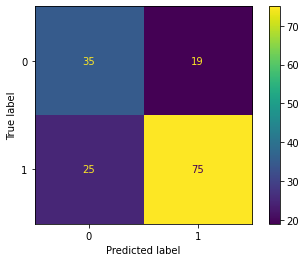

In [250]:

predictions,test_accuracy = prediction(test_features_b,test_labels_b, best_weights_final)
print("test accuracy: ",test_accuracy) 

cm = confusion_matrix (test_labels_b, predictions)
cm_table = ConfusionMatrixDisplay(cm)
cm_table.plot()
plt.show()

In [262]:
#Precision = true positive /true positive + false positive
#Recall = true positive /true positive+ false negative
#sensitivity = true positive /true positive+ false negative (same as recall calculation)
#specificity = true negative/true negative+false positive
#True_positive_rate = true positive /true positive+ false negative
#True_negative_rate = true negative/true negative+false positive

precision = precision_score(test_labels_b, predictions)
recall = recall_score(test_labels_b, predictions)
sensitivity = recall_score(test_labels_b, predictions)
specificity = 75/(75+19) 
balanced_accuracy = balanced_accuracy_score(test_labels_b, predictions)
print("precision: ",precision,"\nrecall: ", recall,"\nsensitivity: ",sensitivity,"\nspecificity: ",specificity)
print("Balanced accuracy",balanced_accuracy)

precision:  0.7978723404255319 
recall:  0.75 
sensitivity:  0.75 
specificity:  0.7978723404255319
Balanced accuracy 0.6990740740740741
